In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e18/sample_submission.csv
/kaggle/input/playground-series-s3e18/train.csv
/kaggle/input/playground-series-s3e18/test.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as py
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_sample_submission=pd.read_csv('/kaggle/input/playground-series-s3e18/sample_submission.csv')
df_test=pd.read_csv('/kaggle/input/playground-series-s3e18/test.csv')
df_train=pd.read_csv('/kaggle/input/playground-series-s3e18/train.csv')

In [4]:
df_sample_submission.head()

,id,EC1,EC2
0,14838,0.5,0.5
1,14839,0.5,0.5
2,14840,0.5,0.5
3,14841,0.5,0.5
4,14842,0.5,0.5


In [5]:
def summary(df):
    print(f'data shape: {df.shape}')
    summ=pd.DataFrame(df.dtypes, columns=['data type'])
    summ['#missing']=df.isnull().sum().values
    summ['%missing']=df.isnull().sum().values/len(df)*100
    summ['#unique']=df.nunique().values
    
    desc=pd.DataFrame(df.describe(include='all').transpose())
    
    summ['min']=desc['min'].values
    summ['max']=desc['max'].values
    summ['average']=desc['mean'].values
    summ['standard deviation']=desc['std'].values
    
    return summ

In [6]:
summary(df_train)

data shape: (14838, 38)


,data type,#missing,%missing,#unique,min,max,average,standard deviation
id,int64,0,0.0,14838,0.000000,14837.000000,7418.500000,4283.505982
BertzCT,float64,0,0.0,2368,0.000000,4069.959780,515.153604,542.456370
Chi1,float64,0,0.0,1259,0.000000,69.551167,9.135189,6.819989
Chi1n,float64,0,0.0,3157,0.000000,50.174588,5.854307,4.647064
Chi1v,float64,0,0.0,3306,0.000000,53.431954,6.738497,5.866444
Chi2n,float64,0,0.0,3634,0.000000,32.195368,4.432570,3.760516
Chi2v,float64,0,0.0,3725,0.000000,34.579313,5.253221,4.925065
Chi3v,float64,0,0.0,3448,0.000000,22.880836,3.418749,3.436208
Chi4n,float64,0,0.0,2930,0.000000,16.072810,1.773472,1.865898
EState_VSA1,float64,0,0.0,719,0.000000,363.705954,29.202823,31.728679


In [7]:
df_train_model_ec1=df_train
df_train_model_ec1.drop(['id','EC2','EC3','EC4','EC5','EC6'], axis=1, inplace=True)

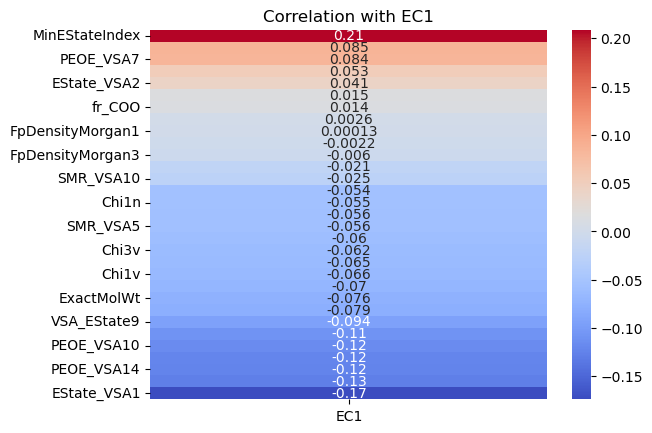

In [8]:
corr_matrix_ec1=df_train_model_ec1.corr()
target_corr_ec=corr_matrix_ec1['EC1'].drop('EC1')
corr_matrix_ec1_sorted=target_corr_ec.sort_values(ascending=False)

sns.heatmap(corr_matrix_ec1_sorted.to_frame(),cmap='coolwarm',annot=True)
plt.title('Correlation with EC1')
plt.show()